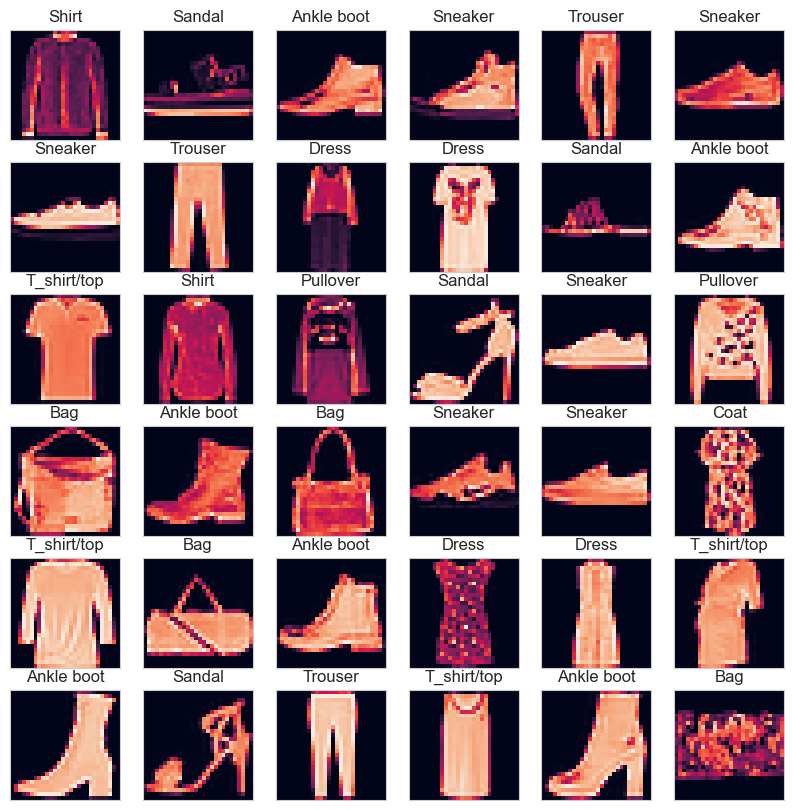

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01568628],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [36]:
# https://www.kaggle.com/competitions/pgsfashionmnist

from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

warnings.filterwarnings('ignore')
epochs = 20
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)

train_df = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./input/fashion-mnist_test.csv', sep = ',')

# print(check_output(["ls", "./input"]).decode("utf8"))
# print(train_df.head())
# print(train_df.shape)

train_np = np.array(train_df, dtype = 'float32')
test_np = np.array(test_df, dtype='float32')

# Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way:
x_train = train_np[:,1:]/255
y_train = train_np[:,0]
x_test = test_np[:,1:]/255
y_test = test_np[:,0]

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

image_rows = 28
image_cols = 28
# batch_size = 4096
# the shape of the image as 3d with rows and columns grey scale
image_shape = (image_rows, image_cols, 1)

x_train = x_train.reshape(-1, *image_shape)
x_test = x_test.reshape(-1, *image_shape)
x_validate = x_validate.reshape(-1, *image_shape)
# x_train = x_train.reshape(x_train.shape[0], *image_shape)
# x_test = x_test.reshape(x_test.shape[0], *image_shape)
# x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

y_train = to_categorical(y_train, num_classes)
y_validate = to_categorical(y_validate, num_classes)
y_test = to_categorical(y_test, num_classes)


x_test

In [37]:
x_test.shape

(10000, 28, 28, 1)

In [38]:

from sklearn.metrics import classification_report
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Audjusting learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

batch_size = 128

datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_train)
# x_train.shape, y_train.shape
# x_validate.shape, y_validate.shape

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size)
                    , epochs = 3
                    , validation_data = (x_validate, y_validate)
                    , verbose = 1
                    , steps_per_epoch=len(x_train) // batch_size
                    , callbacks=[learning_rate_reduction]
                    , validation_steps = len(x_validate) // batch_size
                    )


score = model.evaluate(x_test, y_test, verbose=1)


predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y_test = test_df.iloc[:, 0]
print(classification_report(y_test, predicted_classes, target_names=class_names))

Epoch 1/3


2023-03-08 16:35:02.412431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 0.6481 - accuracy: 0.7636

2023-03-08 16:35:52.863378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 55s 141ms/step - loss: 0.6481 - accuracy: 0.7636 - val_loss: 0.9126 - val_accuracy: 0.6743 - lr: 0.0010
Epoch 2/3
375/375 [==============================] - 50s 133ms/step - loss: 0.4260 - accuracy: 0.8411 - val_loss: 0.2976 - val_accuracy: 0.8917 - lr: 0.0010
Epoch 3/3
313/313 [==============================] - 5s 14ms/step - loss: 0.3837 - accuracy: 0.8434
>>>> Test Loss : 0.3837
>>>> Test Accuracy : 0.8434


  5/313 [..............................] - ETA: 3s 

2023-03-08 16:37:33.728278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.95      0.63      0.76      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.97      0.46      0.62      1000
       Dress       0.82      0.95      0.88      1000
        Coat       0.80      0.73      0.76      1000
      Sandal       0.91      0.99      0.95      1000
       Shirt       0.49      0.87      0.62      1000
     Sneaker       0.96      0.91      0.93      1000
         Bag       0.96      0.99      0.97      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.88      0.84      0.84     10000
weighted avg       0.88      0.84      0.84     10000



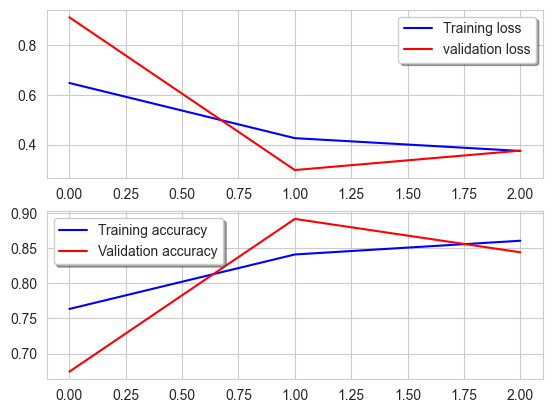

In [39]:

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

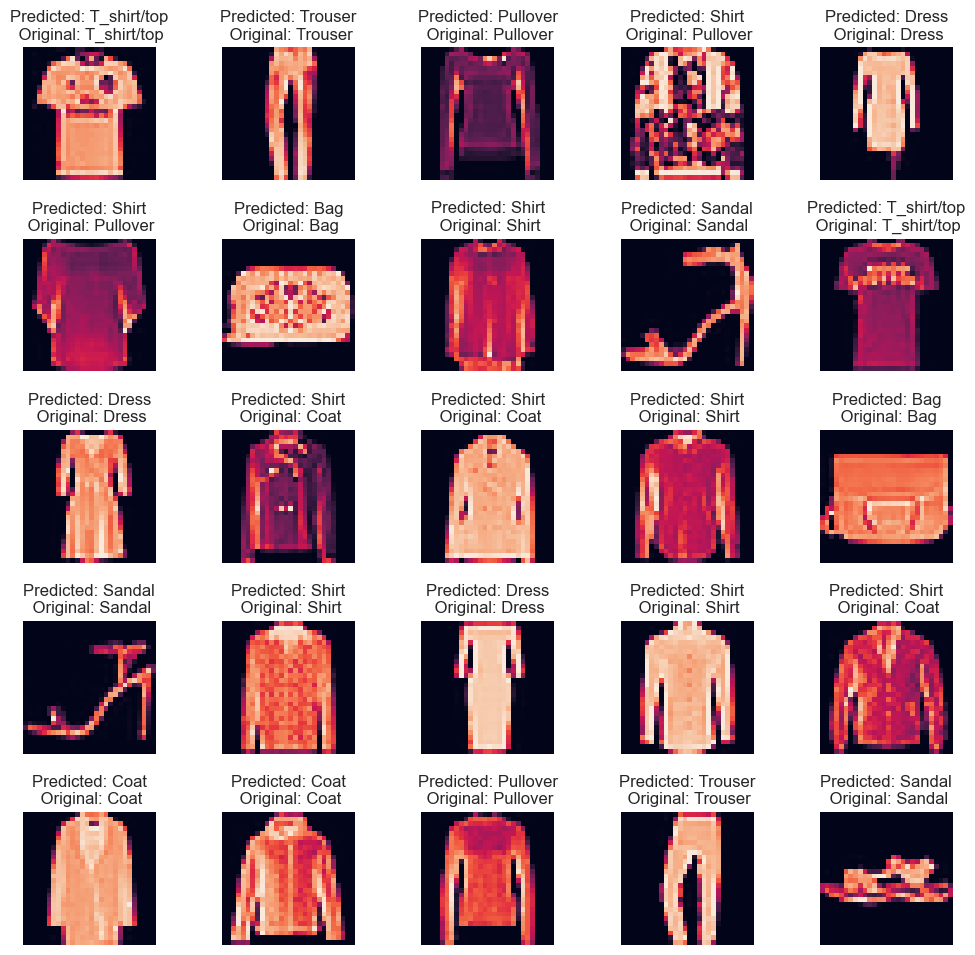

In [40]:

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    # axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}\n Original: {class_names[y_test[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)